In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df=pd.read_csv("C:\\Users\\varun\\Downloads\\Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# 1) Data Understanding

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [72]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [73]:
df.shape

(200, 5)

In [74]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# 2) Data Preprocessing

1) Outlier Detection

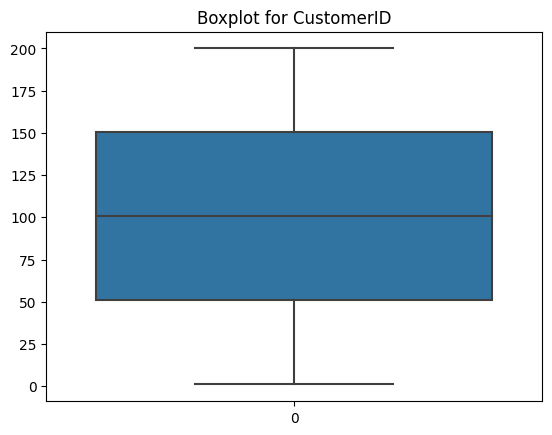

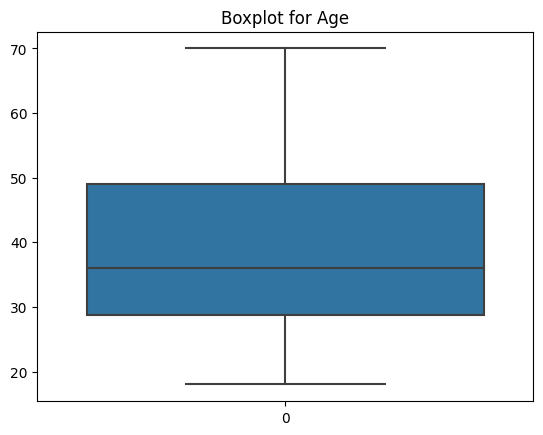

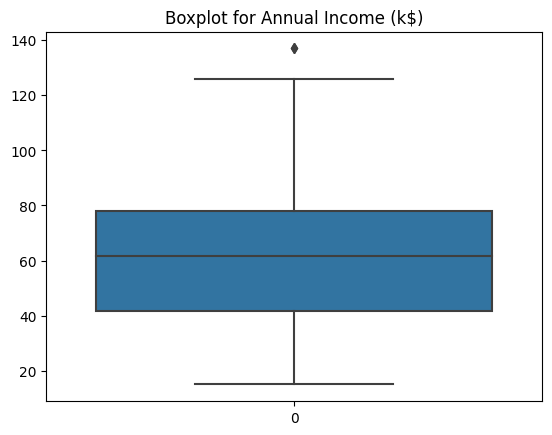

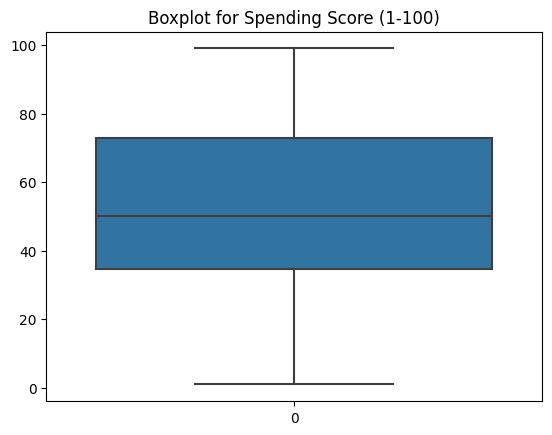

In [75]:
num_cols=df.select_dtypes(include='int')
num_cols

for col in num_cols:
    sns.boxplot(df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


2) Label Encoding

In [76]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']= le.fit_transform(df["Gender"])

In [77]:
df=df.drop(columns=['CustomerID'],axis=1)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


3) Scaling

In [78]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
df=pd.DataFrame(sc.fit_transform(df),columns=df.columns)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008197,0.051020
3,0.0,0.096154,0.008197,0.775510
4,0.0,0.250000,0.016393,0.397959
...,...,...,...,...
195,0.0,0.326923,0.860656,0.795918
196,0.0,0.519231,0.909836,0.275510
197,1.0,0.269231,0.909836,0.744898
198,1.0,0.269231,1.000000,0.173469


4) Feature Selection for Clustering

In [79]:
X= df.iloc[:, [2,3]].values #considring Annual Income and spending score for clustering
X.shape

(200, 2)

# 3) Machine learning approach with Elbow Algorithm

In [80]:
from sklearn import cluster
#create an empty for holding error values
error=[]
for i in range(1,11):#(1-10)classes
    kmeans=cluster.KMeans(n_clusters =i,init='k-means++',random_state=0)#k-means++ for faster convergence
    kmeans.fit(df)#assigning the data points to clusters
    error.append(kmeans.inertia_)

c:\Users\varun\miniconda3\envs\vsc\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\varun\miniconda3\envs\vsc\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\varun\miniconda3\envs\vsc\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\varun\miniconda3\envs\vsc\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

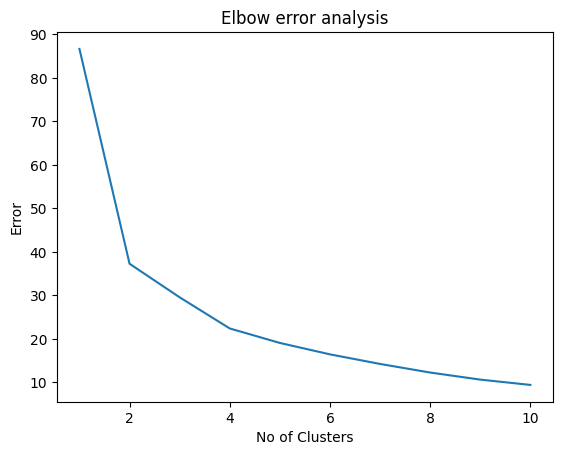

In [81]:
plt.plot(range(1,11),error)
plt.xlabel('No of Clusters')
plt.ylabel('Error')
plt.title('Elbow error analysis')
plt.show()

In [82]:
knn_model6=cluster.KMeans(n_clusters =6,init='k-means++',random_state=0)
knn_model6.fit(df)

knn_model5=cluster.KMeans(n_clusters =5,init='k-means++',random_state=0)
knn_model5.fit(df)
pred_class=knn_model5.predict(df)

knn_model4=cluster.KMeans(n_clusters =4,init='k-means++',random_state=0)
knn_model4.fit(df)


c:\Users\varun\miniconda3\envs\vsc\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\varun\miniconda3\envs\vsc\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\varun\miniconda3\envs\vsc\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=0)

Predictive analysis

In [83]:
print(knn_model6.predict([[1,2,4,4]]))
print(knn_model5.predict([[1,2,4,4]]))
print(knn_model4.predict([[1,2,4,4]]))

[3]
[1]
[1]


c:\Users\varun\miniconda3\envs\vsc\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
c:\Users\varun\miniconda3\envs\vsc\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
c:\Users\varun\miniconda3\envs\vsc\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


# Visualisation of Clusters

c:\Users\varun\miniconda3\envs\vsc\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


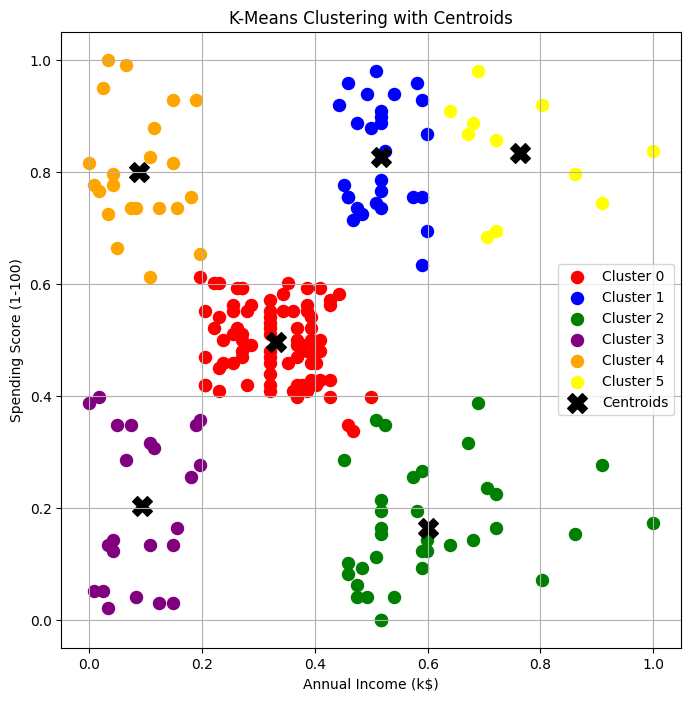

In [84]:
df['Cluster6'] = knn_model6.fit_predict(X)
n_clusters=6
# Get cluster centers (centroids)
centroids = knn_model6.cluster_centers_

colors = ['red', 'blue', 'green', 'purple', 'orange','yellow'] 

plt.figure(figsize=(8, 8))
for i in range(n_clusters):
    cluster_data = df[df['Cluster6'] == i]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
                label=f'Cluster {i}', c=colors[i], s=75)

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='black', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering with Centroids')
plt.legend()
plt.grid(True)
plt.show()

c:\Users\varun\miniconda3\envs\vsc\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


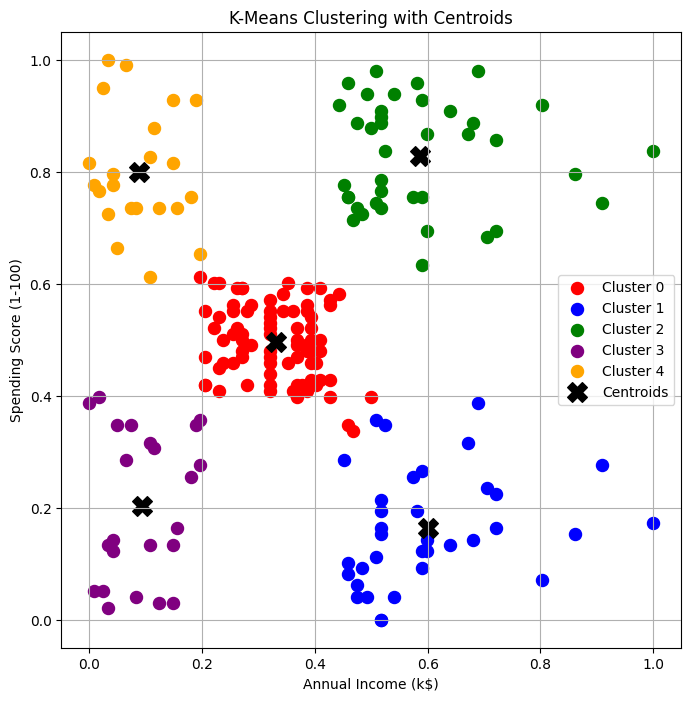

In [85]:
df['Cluster5'] = knn_model5.fit_predict(X)
n_clusters=5
# Get cluster centers (centroids)
centroids = knn_model5.cluster_centers_

colors = ['red', 'blue', 'green', 'purple', 'orange'] 

plt.figure(figsize=(8, 8))
for i in range(n_clusters):
    cluster_data = df[df['Cluster5'] == i]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
                label=f'Cluster {i}', c=colors[i], s=75)

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='black', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering with Centroids')
plt.legend()
plt.grid(True)
plt.show()

c:\Users\varun\miniconda3\envs\vsc\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


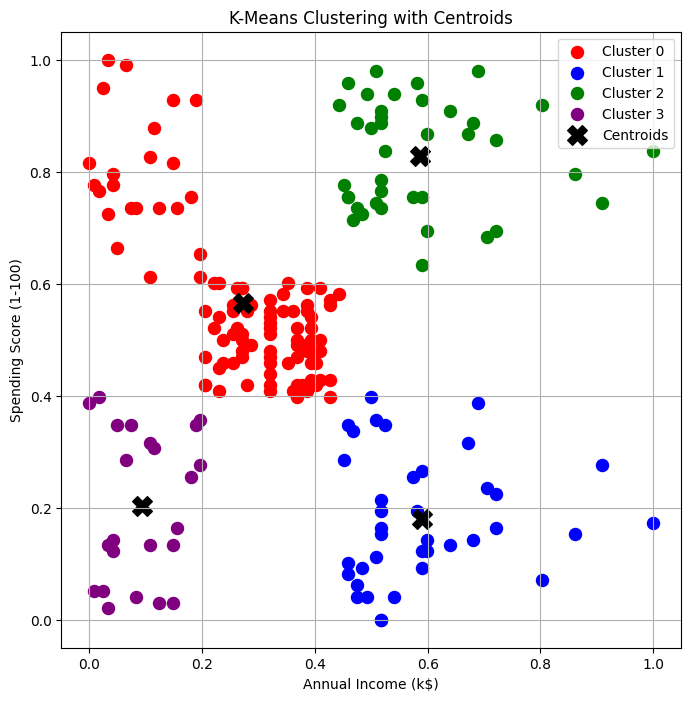

In [86]:
# for 4 clusters
df['Cluster4'] = knn_model4.fit_predict(X)
n_clusters=4
# Get cluster centers (centroids)
centroids = knn_model4.cluster_centers_

colors = ['red', 'blue', 'green', 'purple', 'orange'] 

plt.figure(figsize=(8, 8))
for i in range(n_clusters):
    cluster_data = df[df['Cluster4'] == i]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
                label=f'Cluster {i}', c=colors[i], s=75)

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='black', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering with Centroids')
plt.legend()
plt.grid(True)
plt.show()

# Evaluation


In [87]:
inertia_score = knn_model6.inertia_
print("inertia_score of 6 clusters:",inertia_score)

inertia_score of 6 clusters: 3.1003435707513747


In [88]:
inertia_score = knn_model5.inertia_
print("inertia_score of 5 clusters:",inertia_score)

inertia_score of 5 clusters: 3.5831179059525606


In [89]:
inertia_score = knn_model4.inertia_
print("inertia_score of 4 clusters:",inertia_score)

inertia_score of 4 clusters: 6.110312266413656


In [90]:
from sklearn.metrics import silhouette_score

silhouette_km6 = silhouette_score(X, df['Cluster6'])
print("Silhouette Score  of 6 clusters:", silhouette_km6)

silhouette_km5 = silhouette_score(X, df['Cluster5'])
print("Silhouette Score  of 5 clusters:", silhouette_km5)


silhouette_km4 = silhouette_score(X, df['Cluster4'])
print("Silhouette Score  of 4 clusters:", silhouette_km4)


Silhouette Score  of 6 clusters: 0.535817696916733
Silhouette Score  of 5 clusters: 0.5594854531227246
Silhouette Score  of 4 clusters: 0.49620078745146784


In [91]:
#clustered datset
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster6,Cluster5,Cluster4
0,1.0,0.019231,0.000000,0.387755,3,3,3
1,1.0,0.057692,0.000000,0.816327,4,4,0
2,0.0,0.038462,0.008197,0.051020,3,3,3
3,0.0,0.096154,0.008197,0.775510,4,4,0
4,0.0,0.250000,0.016393,0.397959,3,3,3
...,...,...,...,...,...,...,...
195,0.0,0.326923,0.860656,0.795918,5,2,2
196,0.0,0.519231,0.909836,0.275510,2,1,1
197,1.0,0.269231,0.909836,0.744898,5,2,2
198,1.0,0.269231,1.000000,0.173469,2,1,1


**Conclusion**
 
The given data set can be clustered into 5 different calsses